### Reference
* https://kaggle-kr.tistory.com/32
* https://www.kaggle.com/brendan45774/titanic-top-solution
* 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Titanic Dateset Shape : ", titanic.shape)

Titanic Dateset Shape :  (891, 12)


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA
* Survived Percent
* Check NULL Values
* Pclass per Survived Count / Survived per Pclass Count
* Age per Survived Count / Survived per Age Count
* Check Skewness

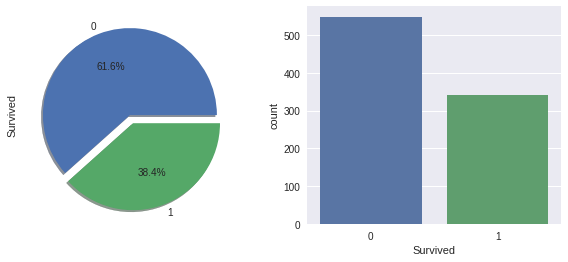

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,4))

titanic['Survived'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot('Survived',data=titanic,ax=ax[1])

plt.show()

<AxesSubplot:>

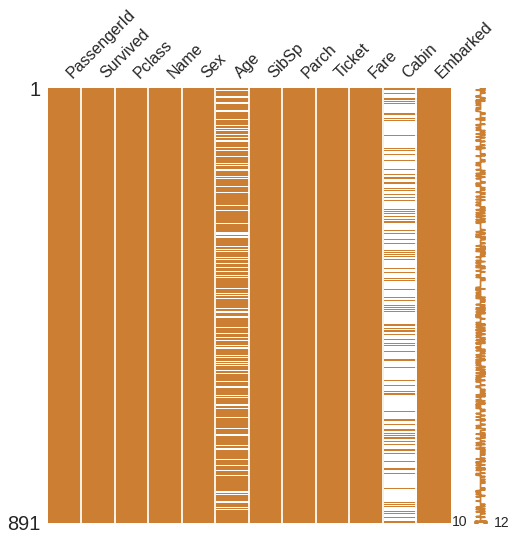

In [8]:
msno.matrix(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot:>

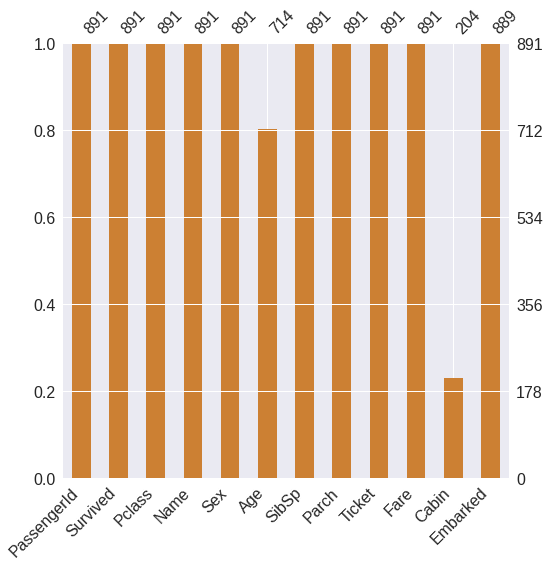

In [9]:
msno.bar(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [10]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
fig = px.scatter_3d(df, x='Name', y='Sex', z='Age',
                    color='Age')
fig.show()

In [11]:
titanic[['Pclass','Survived']].groupby(['Survived'],as_index=True).count()

,Pclass
Survived,
0,549
1,342


In [12]:
titanic[['Pclass','Survived']].groupby(['Survived'],as_index=True).count()

,Pclass
Survived,
0,549
1,342


In [13]:
pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

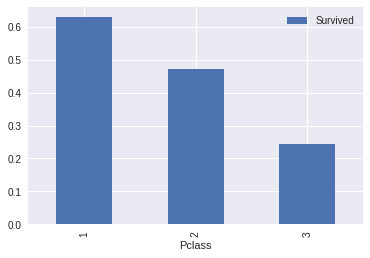

In [14]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

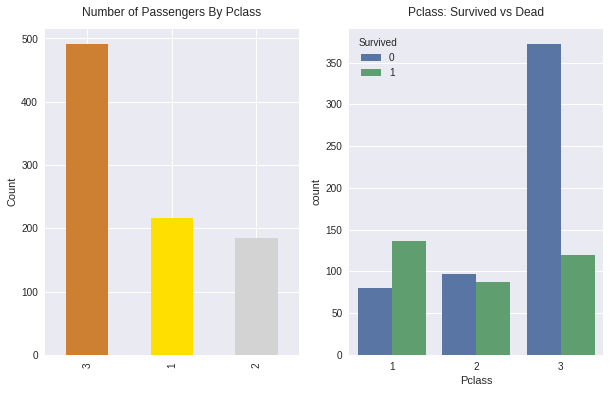

In [15]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(10, 6))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

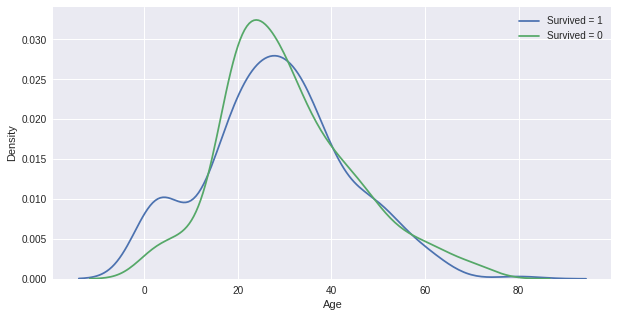

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(titanic[titanic['Survived']==1]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived = 1','Survived = 0'])
plt.show()


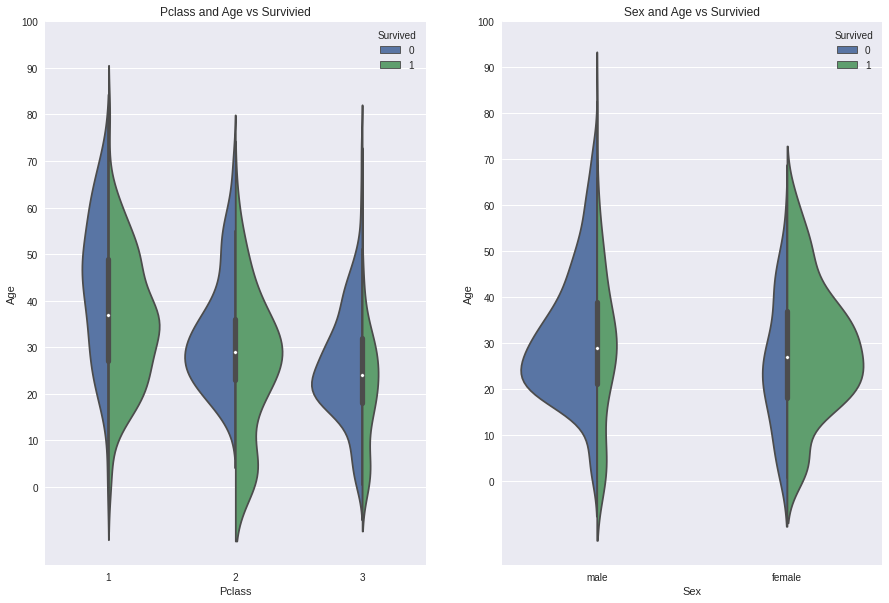

In [17]:
f,ax=plt.subplots(1,2,figsize=[15,10])

sns.violinplot("Pclass","Age",hue="Survived",data=titanic,scale="count",split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survivied")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=titanic,scale="count",split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survivied")
ax[1].set_yticks(range(0,110,10))

plt.show()

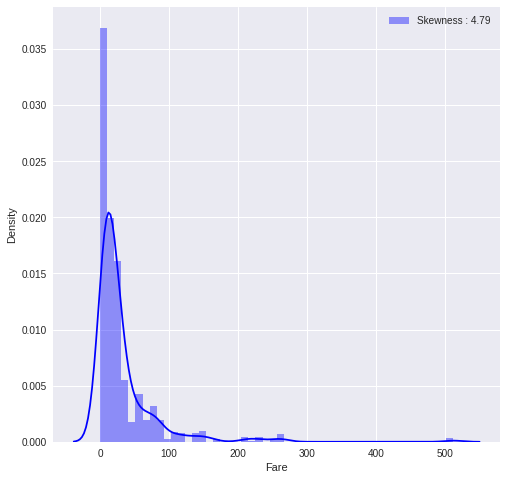

In [18]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
plt.legend(loc='best')

# Preprocessing
* NULL Value Preprocessing
* Drop Columns
* Skeweness Value(Outlier) Preprocessing

In [19]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Cabin'] = titanic['Cabin'].fillna("N")
titanic['Embarked'] = titanic['Embarked'].fillna("N")

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [21]:
titanic.loc[titanic["Fare"].isnull(),"Fare"] = titanic["Fare"].mean()
titanic["Fare"] = titanic["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

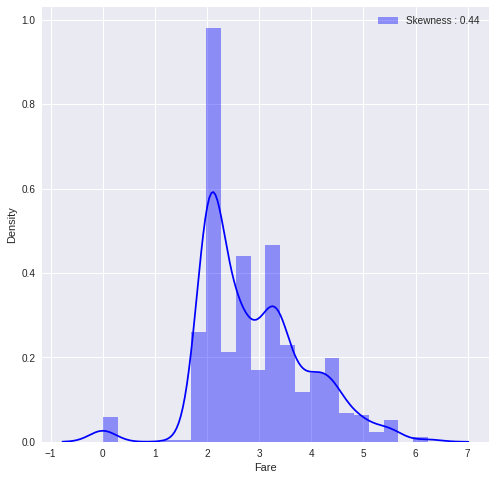

In [22]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe7e1af7f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe7e1afe810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe7e1af7b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe7e1a88110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe7e1a88550>],
 'means': []}

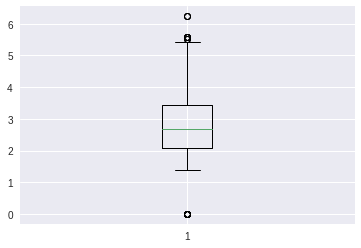

In [23]:
plt.boxplot(titanic['Fare'])

In [24]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,N,S


In [25]:
titanic.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,1.981001,N,S
1,1,1,female,38.0,1,0,4.266662,C,C
2,1,3,female,26.0,0,0,2.070022,N,S
3,1,1,female,35.0,1,0,3.972177,C,S
4,0,3,male,35.0,0,0,2.085672,N,S


In [26]:
titanic['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [27]:
Cabin_T_index = titanic[titanic['Cabin']=='T'].index
titanic.drop(Cabin_T_index,inplace=True)

In [28]:
titanic['Embarked'].value_counts()

S    643
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [29]:
Embarked_N_index = titanic[titanic['Embarked']=='N'].index
titanic.drop(Embarked_N_index,inplace=True)

# Feature Engineering
* OneHot Encoding
* Split Train Data / Test Data
* 

In [30]:
titanic = pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,2.070022,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,3.972177,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,2.085672,0,1,0,0,0,0,0,0,0,1,0,0,1


In [31]:
titanic.shape

(888, 19)

In [32]:
x = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [33]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,1.981001,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,4.266662,1,0,0,0,1,0,0,0,0,0,1,0,0
2,3,26.0,0,0,2.070022,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,3.972177,1,0,0,0,1,0,0,0,0,0,0,0,1
4,3,35.0,0,0,2.085672,0,1,0,0,0,0,0,0,0,1,0,0,1


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

# Modeling
* LogisticRegression
* DecisionTreeClassifier with GridSearchCV / CroosValScore
*

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))

모델 정확도 측정 :  0.7387387387387387


In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))

모델 정확도 측정 :  0.7747747747747747


In [37]:
param = {'max_depth':[2,4,6,8],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,3,5]
        }
grid = GridSearchCV(dtree,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [38]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [39]:
grid.best_score_

0.8142004697517933

In [40]:
score = cross_val_score(dtree,x,y,scoring='accuracy',cv=5)
score.mean()

0.7815273281279757

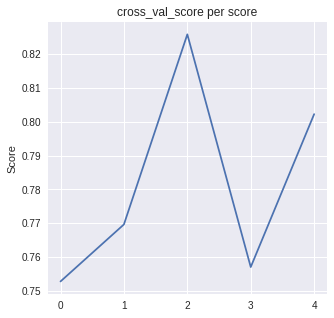

In [41]:
f,ax=plt.subplots(1,1,figsize=(5,5))
plt.plot(score)
ax.set_title("cross_val_score per score")
ax.set_xticks(range(0,5,1))
ax.set_ylabel("Score")
plt.show()

In [42]:
rfc = RandomForestClassifier()

In [43]:
param = {'n_estimators' : [100],
         'max_depth':[10,12,14],
         'min_samples_split':[1,1.5,2],
         'min_samples_leaf':[5,7,9]
        }
grid = GridSearchCV(rfc,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 14],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [1, 1.5, 2],
                         'n_estimators': [100]},
             scoring='accuracy')

In [44]:
grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
grid.best_score_

0.8198184472798833

In [46]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=2)

In [47]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("모델 정확도 측정 : ",accuracy_score(pred,y_test))

모델 정확도 측정 :  0.7837837837837838


In [48]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
243,3,22.0,0,0,1.963610,0,1,0,0,0,0,0,0,0,1,0,0,1
385,2,18.0,0,0,4.297285,0,1,0,0,0,0,0,0,0,1,0,0,1
546,2,19.0,1,0,3.258097,1,0,0,0,0,0,0,0,0,1,0,0,1
290,1,26.0,0,0,4.367547,1,0,0,0,0,0,0,0,0,1,0,0,1
613,3,28.0,0,0,2.047693,0,1,0,0,0,0,0,0,0,1,0,1,0


# Submission

In [49]:
gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [50]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Cabin'] = test['Cabin'].fillna("N")
test['Embarked'] = test['Embarked'].fillna("N")

In [53]:
test.loc[test["Fare"].isnull(),"Fare"] = test["Fare"].mean()
test["Fare"] = test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

In [54]:
test['Cabin'] = test['Cabin'].str[:1]

In [55]:
test.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [56]:
test = pd.get_dummies(test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,2.057860,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,1,0,1.945910,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,2.270836,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,2.159003,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,2.508582,1,0,0,0,0,0,0,0,0,1,0,0,1


In [57]:
test_pred = model.predict(test)

In [58]:
gender['Survived'] = test_pred
gender.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [59]:
gender.to_csv('submission.csv',index=False)

### THX to Reading My Notebook🌈